# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [3]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("love.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

당신 없이도 도 봄날이어서

살구꽃 분홍빛 저리환합니다

언젠가 당신에게도 찾아갔었을

분홍빛 오늘은 내 가슴에 듭니다

머잖아 저 분홍빛 차차 엷어져서는

어느날 푸른 빛 속으로 사라지 겠지요

당신 가슴 속에 스며들었을 내 추억도

이제 다 스러지고 말았을지도 모르는데

살구꽃 환한 나무 아래서 당신 생각입니다

앞으로 몇 번이나 저 분홍빛 그대와 나

우리 가슴 속에 찾아와 머물다 갈건지요

잘 지내 주어요 더 이상 내가 그대안의

분홍빛 아니어도 그대의 봄 아름답기를




In [4]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("you.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

어느 날 내가 다시 사랑할 수 있다면
어느 날 내가 다시
사랑할 수 있다면
그대 마중하던 가을날 그 언덕길을
그토록 서둘러 내려오지는 않았겠습니다
그대의 여린 손끝
내 체온으로 기억하며
수줍은 그대 눈빛까지도 
찬찬히 바라보겠습니다
어느 날 내가 다시
사랑할 수 있다면 
그대 함께하던 따뜻한 그 커피잔을
그토록 서둘러 마셔버리지는 않겠습니다
찻잔에 베인 온기
내 가슴으로 기억하며
푸르른 그대 향기까지도
찬찬히 읽어가겠습니다
어느 날 내가 다시
사랑할 수 있다면 
내 맘 같지도 않은 괜한 자존심의 일로써 
그토록 내 자신만을
서둘러 고집하지는 않겠습니다
사소한 배려의 일조차
먼저 마음으로 준비하며 
나 그대의 웃음 뒤에 비로소
그대처럼 행복해 하겠습니다
어느 날 내가 다시
사랑할 수 있다면 
그토록 그대를 
서둘러 떠나보내지는 않겠습니다
내가 할 수 있는 세상에 사랑
모두 그대에게 건네 드리고 
그 때쯤에야 떠나는 그대 뒷모습
눈물로써 허락하겠습니다
어느 날 내가 다시 사랑할 수 있다면...
어느 날 그대 다시 사랑할 수 있다면...



## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [5]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['당신 없이도 도 봄날이어서',
 '살구꽃 분홍빛 저리환합니다',
 '언젠가 당신에게도 찾아갔었을',
 '분홍빛 오늘은 내 가슴에 듭니다',
 '머잖아 저 분홍빛 차차 엷어져서는',
 '어느날 푸른 빛 속으로 사라지 겠지요',
 '당신 가슴 속에 스며들었을 내 추억도',
 '이제 다 스러지고 말았을지도 모르는데',
 '살구꽃 환한 나무 아래서 당신 생각입니다',
 '앞으로 몇 번이나 저 분홍빛 그대와 나',
 '우리 가슴 속에 찾아와 머물다 갈건지요',
 '잘 지내 주어요 더 이상 내가 그대안의',
 '분홍빛 아니어도 그대의 봄 아름답기를',
 '']

In [6]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['어느 날 내가 다시 사랑할 수 있다면\n어느 날 내가 다시\n사랑할 수 있다면\n그대 마중하던 가을날 그 언덕길을\n그토록 서둘러 내려오지는 않았겠습니다\n그대의 여린 손끝\n내 체온으로 기억하며\n수줍은 그대 눈빛까지도 \n찬찬히 바라보겠습니다\n어느 날 내가 다시\n사랑할 수 있다면 \n그대 함께하던 따뜻한 그 커피잔을\n그토록 서둘러 마셔버리지는 않겠습니다\n찻잔에 베인 온기\n내 가슴으로 기억하며\n푸르른 그대 향기까지도\n찬찬히 읽어가겠습니다\n어느 날 내가 다시\n사랑할 수 있다면 \n내 맘 같지도 않은 괜한 자존심의 일로써 \n그토록 내 자신만을\n서둘러 고집하지는 않겠습니다\n사소한 배려의 일조차\n먼저 마음으로 준비하며 \n나 그대의 웃음 뒤에 비로소\n그대처럼 행복해 하겠습니다\n어느 날 내가 다시\n사랑할 수 있다면 \n그토록 그대를 \n서둘러 떠나보내지는 않겠습니다\n내가 할 수 있는 세상에 사랑\n모두 그대에게 건네 드리고 \n그 때쯤에야 떠나는 그대 뒷모습\n눈물로써 허락하겠습니다\n어느 날 내가 다시 사랑할 수 있다면...\n어느 날 그대 다시 사랑할 수 있다면...\n']

In [7]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<14x47 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [8]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<1x67 sparse matrix of type '<class 'numpy.int64'>'
	with 67 stored elements in Compressed Sparse Row format>

In [9]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

47
47


['가슴으로',
 '가을날',
 '같지도',
 '건네',
 '고집하지는',
 '괜한',
 '그대',
 '그대를',
 '그대에게',
 '그대의',
 '그대처럼',
 '그토록',
 '기억하며',
 '내가',
 '내려오지는',
 '눈물로써',
 '눈빛까지도',
 '다시',
 '뒤에',
 '뒷모습',
 '드리고',
 '따뜻한',
 '때쯤에야',
 '떠나는',
 '떠나보내지는',
 '마셔버리지는',
 '마음으로',
 '마중하던',
 '먼저',
 '모두',
 '바라보겠습니다',
 '배려의',
 '베인',
 '비로소',
 '사랑',
 '사랑할',
 '사소한',
 '서둘러',
 '세상에',
 '손끝',
 '수줍은',
 '않겠습니다',
 '않았겠습니다',
 '않은',
 '어느',
 '언덕길을',
 '여린',
 '온기',
 '웃음',
 '일로써',
 '일조차',
 '읽어가겠습니다',
 '있는',
 '있다면',
 '자신만을',
 '자존심의',
 '준비하며',
 '찬찬히',
 '찻잔에',
 '체온으로',
 '커피잔을',
 '푸르른',
 '하겠습니다',
 '함께하던',
 '행복해',
 '향기까지도',
 '허락하겠습니다']

In [10]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

67
67


['가슴으로',
 '가을날',
 '같지도',
 '건네',
 '고집하지는',
 '괜한',
 '그대',
 '그대를',
 '그대에게',
 '그대의',
 '그대처럼',
 '그토록',
 '기억하며',
 '내가',
 '내려오지는',
 '눈물로써',
 '눈빛까지도',
 '다시',
 '뒤에',
 '뒷모습',
 '드리고',
 '따뜻한',
 '때쯤에야',
 '떠나는',
 '떠나보내지는',
 '마셔버리지는',
 '마음으로',
 '마중하던',
 '먼저',
 '모두',
 '바라보겠습니다',
 '배려의',
 '베인',
 '비로소',
 '사랑',
 '사랑할',
 '사소한',
 '서둘러',
 '세상에',
 '손끝',
 '수줍은',
 '않겠습니다',
 '않았겠습니다',
 '않은',
 '어느',
 '언덕길을',
 '여린',
 '온기',
 '웃음',
 '일로써',
 '일조차',
 '읽어가겠습니다',
 '있는',
 '있다면',
 '자신만을',
 '자존심의',
 '준비하며',
 '찬찬히',
 '찻잔에',
 '체온으로',
 '커피잔을',
 '푸르른',
 '하겠습니다',
 '함께하던',
 '행복해',
 '향기까지도',
 '허락하겠습니다']

In [11]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['가슴', '가슴에', '갈건지요', '겠지요', '그대안의', '그대와', '그대의', '나무', '내가', '당신', '당신에게도', '듭니다', '말았을지도', '머물다', '머잖아', '모르는데', '번이나', '봄날이어서', '분홍빛', '사라지', '살구꽃', '생각입니다', '속에', '속으로', '스러지고', '스며들었을', '아니어도', '아래서', '아름답기를', '앞으로', '어느날', '언젠가', '없이도', '엷어져서는', '오늘은', '우리', '이상', '이제', '저리환합니다', '주어요', '지내', '차차', '찾아갔었을', '찾아와', '추억도', '푸른', '환한']


array([2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [12]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가슴으로', '가을날', '같지도', '건네', '고집하지는', '괜한', '그대', '그대를', '그대에게', '그대의', '그대처럼', '그토록', '기억하며', '내가', '내려오지는', '눈물로써', '눈빛까지도', '다시', '뒤에', '뒷모습', '드리고', '따뜻한', '때쯤에야', '떠나는', '떠나보내지는', '마셔버리지는', '마음으로', '마중하던', '먼저', '모두', '바라보겠습니다', '배려의', '베인', '비로소', '사랑', '사랑할', '사소한', '서둘러', '세상에', '손끝', '수줍은', '않겠습니다', '않았겠습니다', '않은', '어느', '언덕길을', '여린', '온기', '웃음', '일로써', '일조차', '읽어가겠습니다', '있는', '있다면', '자신만을', '자존심의', '준비하며', '찬찬히', '찻잔에', '체온으로', '커피잔을', '푸르른', '하겠습니다', '함께하던', '행복해', '향기까지도', '허락하겠습니다']


array([1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 4, 2, 7, 1, 1, 1, 7, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 4, 1, 1, 1, 3, 1, 1,
       7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [13]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'가슴': 2,
 '가슴에': 1,
 '갈건지요': 1,
 '겠지요': 1,
 '그대안의': 1,
 '그대와': 1,
 '그대의': 1,
 '나무': 1,
 '내가': 1,
 '당신': 3,
 '당신에게도': 1,
 '듭니다': 1,
 '말았을지도': 1,
 '머물다': 1,
 '머잖아': 1,
 '모르는데': 1,
 '번이나': 1,
 '봄날이어서': 1,
 '분홍빛': 5,
 '사라지': 1,
 '살구꽃': 2,
 '생각입니다': 1,
 '속에': 2,
 '속으로': 1,
 '스러지고': 1,
 '스며들었을': 1,
 '아니어도': 1,
 '아래서': 1,
 '아름답기를': 1,
 '앞으로': 1,
 '어느날': 1,
 '언젠가': 1,
 '없이도': 1,
 '엷어져서는': 1,
 '오늘은': 1,
 '우리': 1,
 '이상': 1,
 '이제': 1,
 '저리환합니다': 1,
 '주어요': 1,
 '지내': 1,
 '차차': 1,
 '찾아갔었을': 1,
 '찾아와': 1,
 '추억도': 1,
 '푸른': 1,
 '환한': 1}

In [14]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가슴으로': 1,
 '가을날': 1,
 '같지도': 1,
 '건네': 1,
 '고집하지는': 1,
 '괜한': 1,
 '그대': 6,
 '그대를': 1,
 '그대에게': 1,
 '그대의': 2,
 '그대처럼': 1,
 '그토록': 4,
 '기억하며': 2,
 '내가': 7,
 '내려오지는': 1,
 '눈물로써': 1,
 '눈빛까지도': 1,
 '다시': 7,
 '뒤에': 1,
 '뒷모습': 1,
 '드리고': 1,
 '따뜻한': 1,
 '때쯤에야': 1,
 '떠나는': 1,
 '떠나보내지는': 1,
 '마셔버리지는': 1,
 '마음으로': 1,
 '마중하던': 1,
 '먼저': 1,
 '모두': 1,
 '바라보겠습니다': 1,
 '배려의': 1,
 '베인': 1,
 '비로소': 1,
 '사랑': 1,
 '사랑할': 7,
 '사소한': 1,
 '서둘러': 4,
 '세상에': 1,
 '손끝': 1,
 '수줍은': 1,
 '않겠습니다': 3,
 '않았겠습니다': 1,
 '않은': 1,
 '어느': 7,
 '언덕길을': 1,
 '여린': 1,
 '온기': 1,
 '웃음': 1,
 '일로써': 1,
 '일조차': 1,
 '읽어가겠습니다': 1,
 '있는': 1,
 '있다면': 7,
 '자신만을': 1,
 '자존심의': 1,
 '준비하며': 1,
 '찬찬히': 2,
 '찻잔에': 1,
 '체온으로': 1,
 '커피잔을': 1,
 '푸르른': 1,
 '하겠습니다': 1,
 '함께하던': 1,
 '행복해': 1,
 '향기까지도': 1,
 '허락하겠습니다': 1}

### 시각화

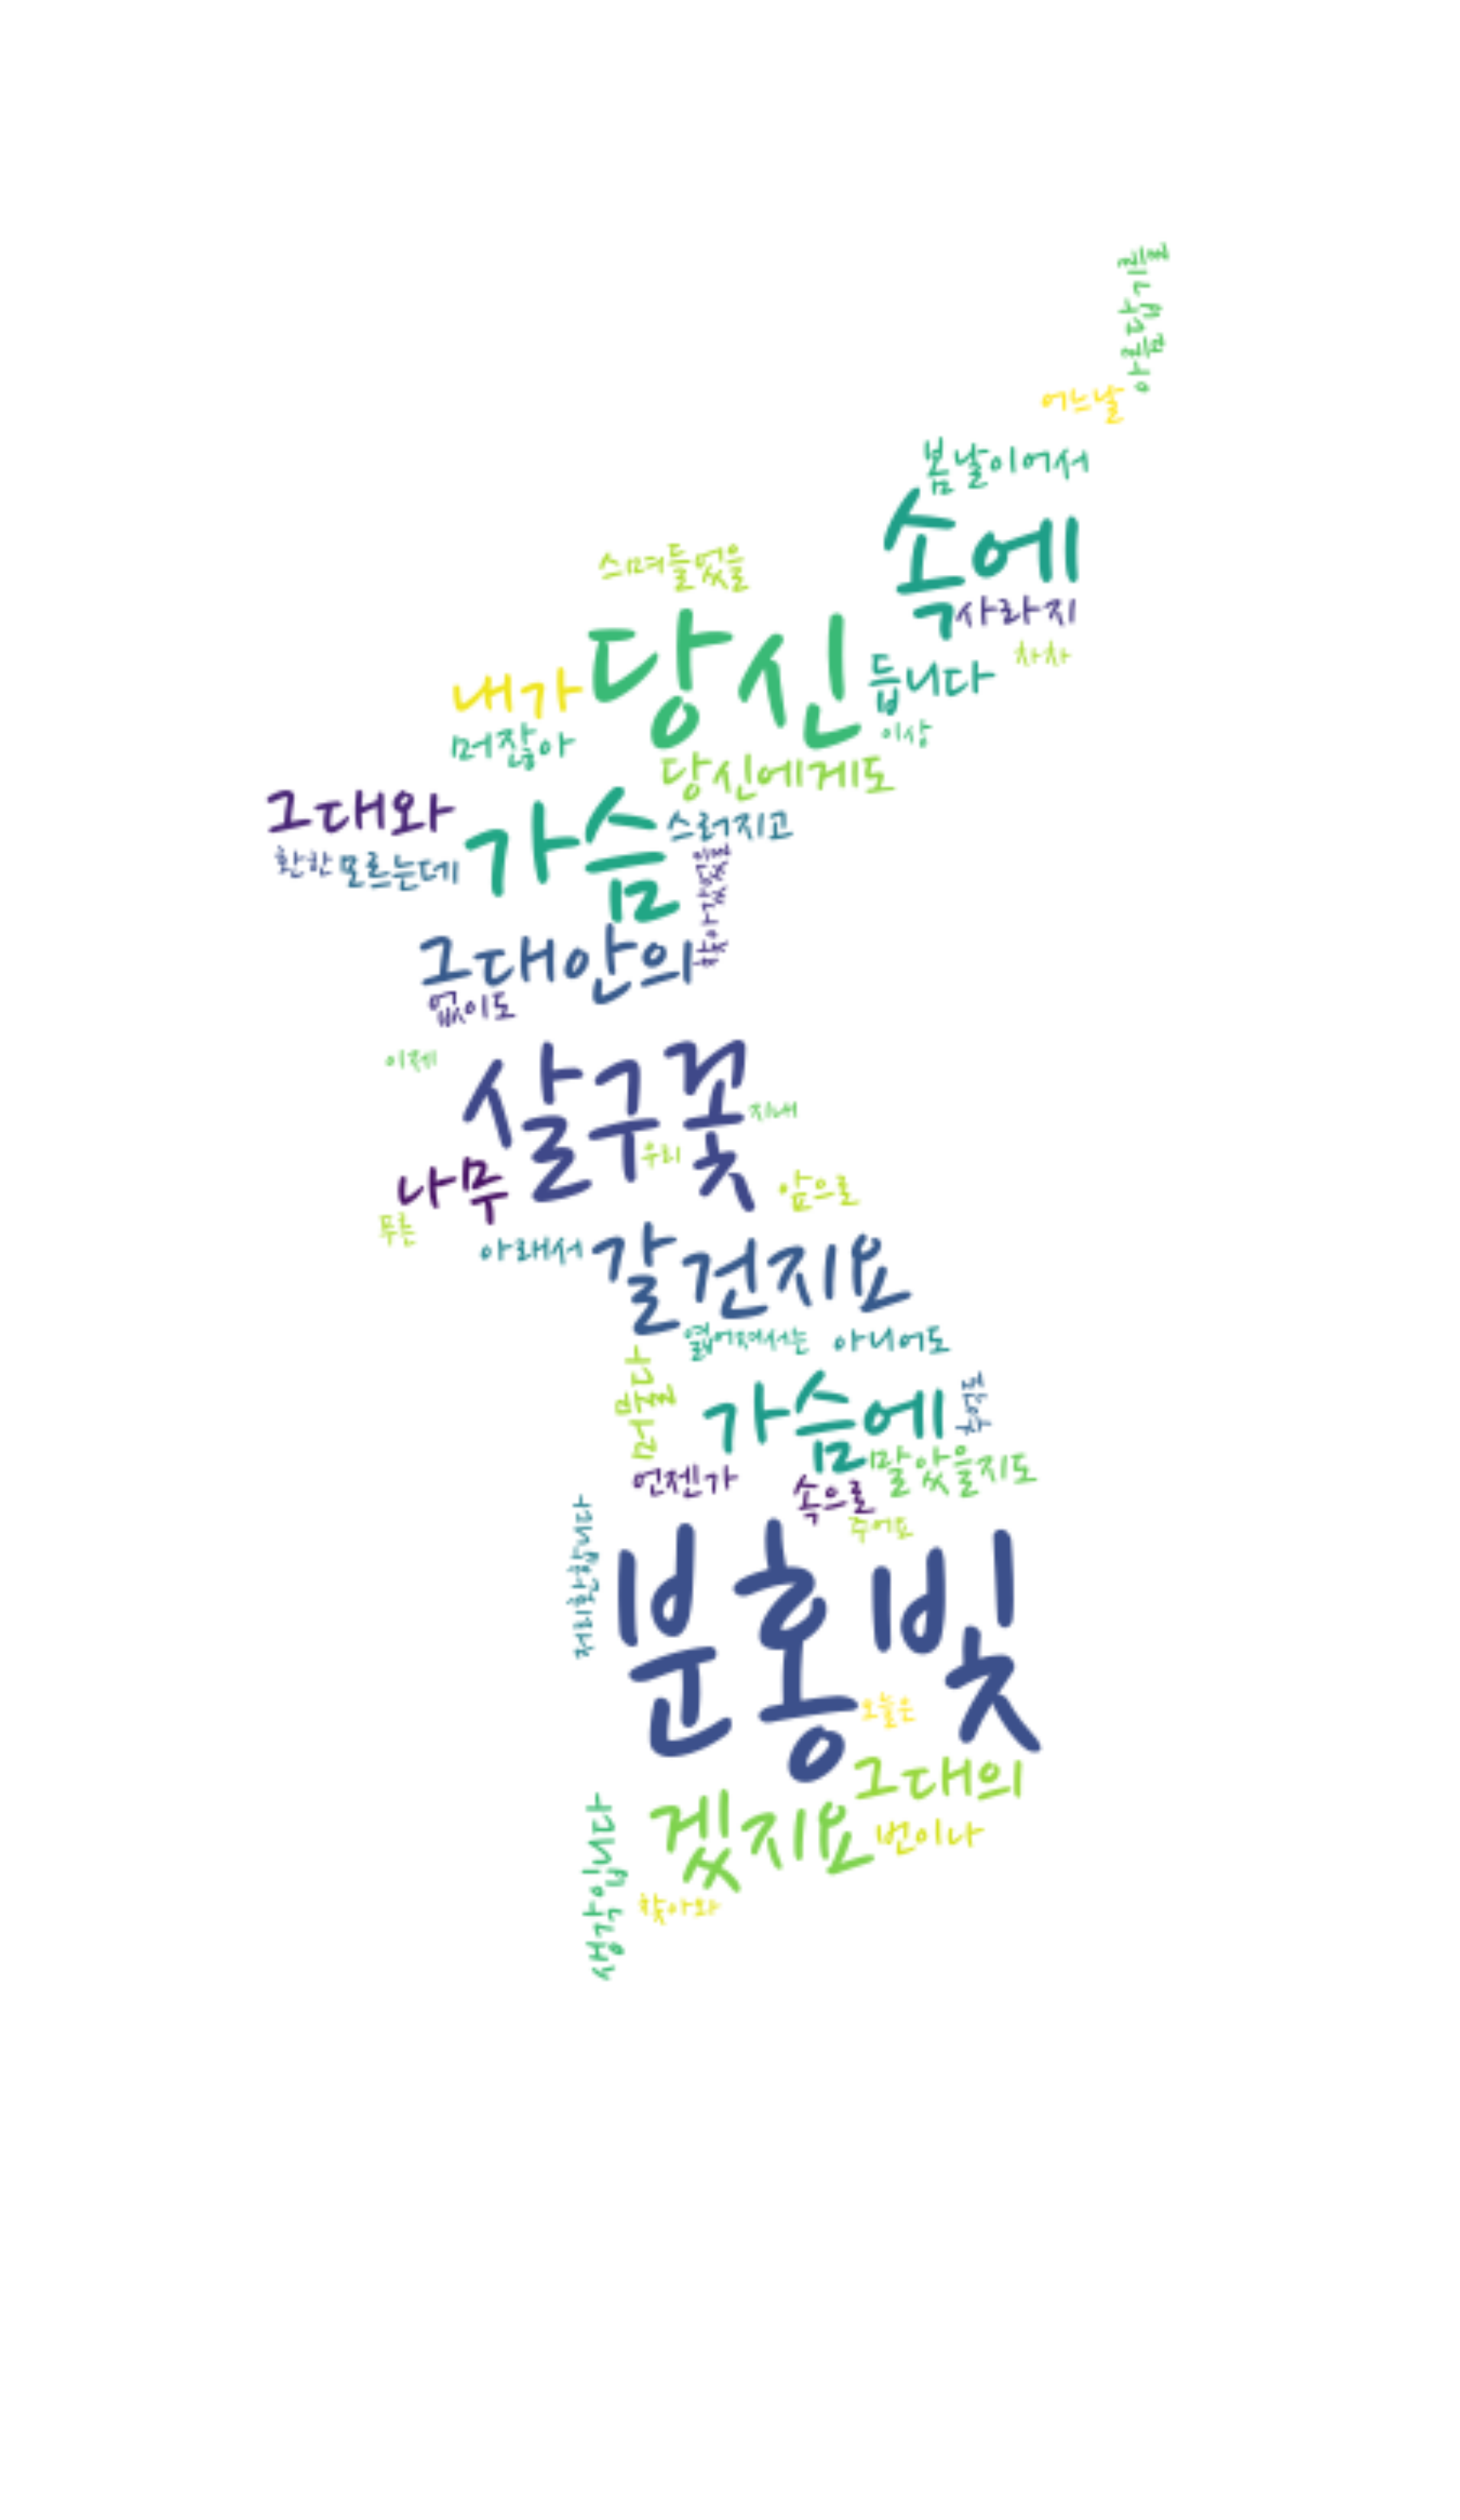

In [15]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

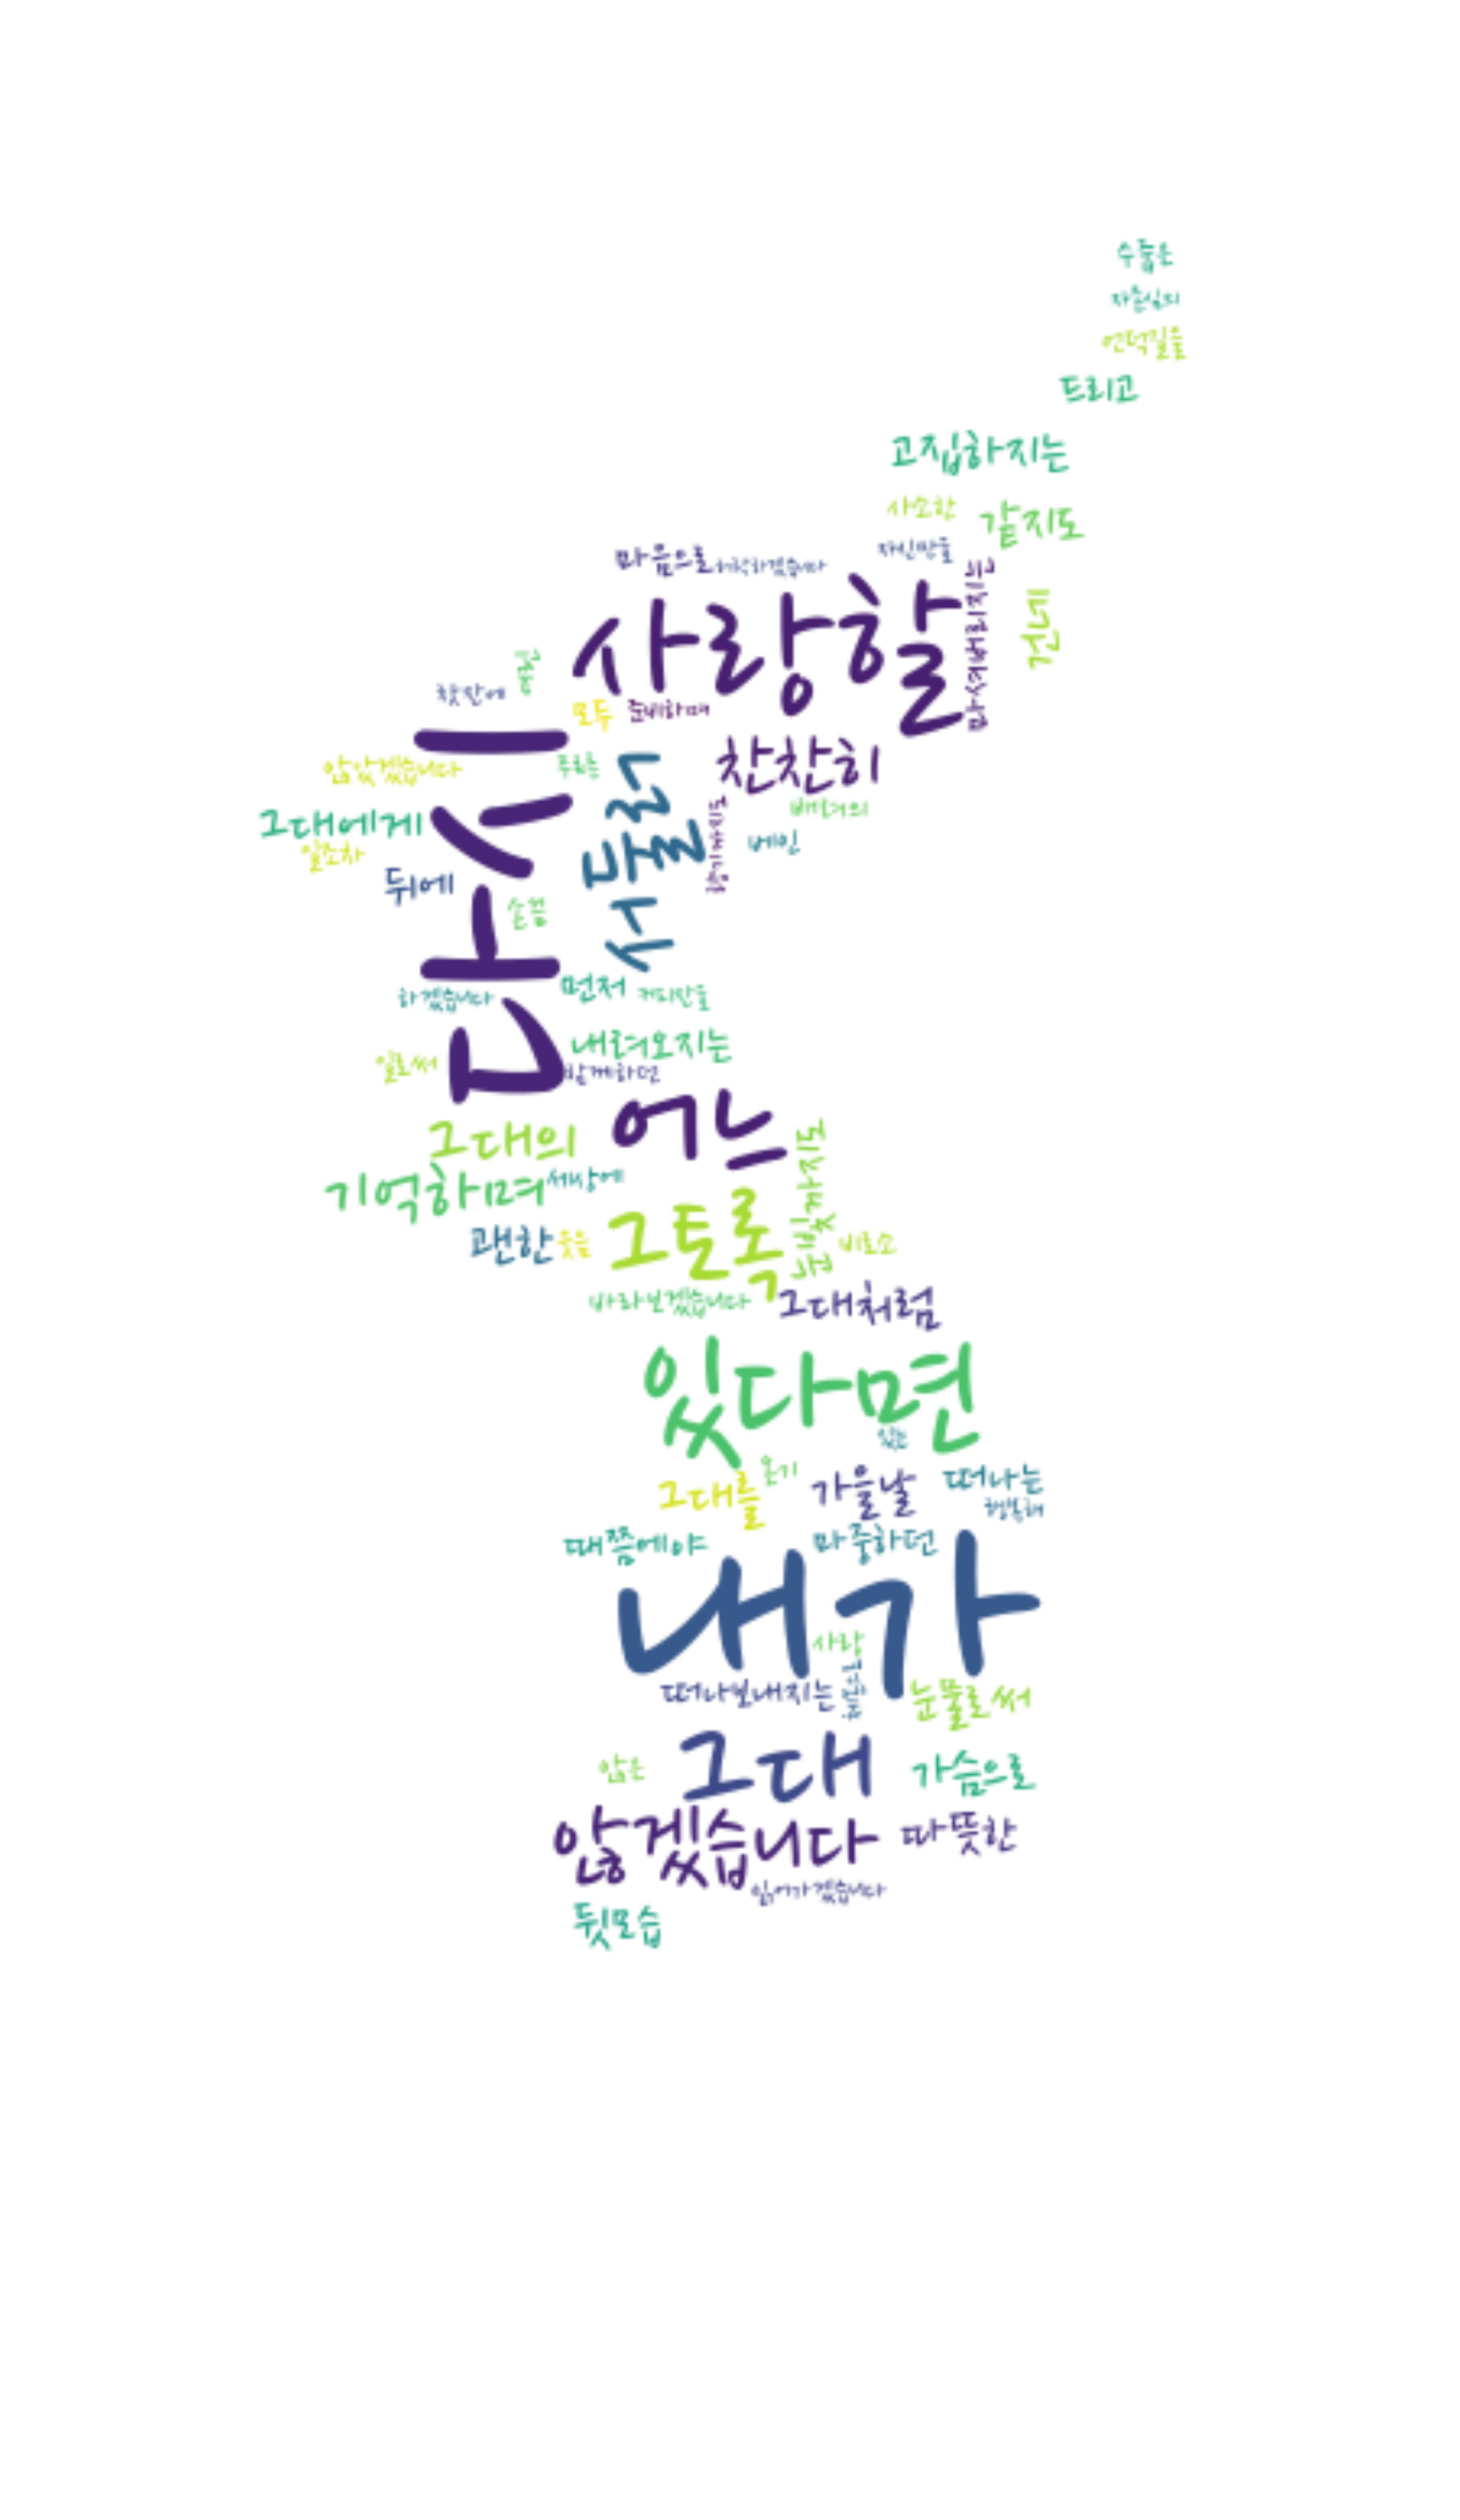

In [16]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기